In [36]:
# Task 1: Working with Series 

import pandas as pd

data = [25, 30, 35, 40, 45]
series = pd.Series(data, index=['A', 'B', 'C', 'D', 'E'])

print(series)
print(series.head(3))

mean_val = series.mean()
median_val = series.median()
std_dev = series.std()

print(f"Mean: {mean_val}")
print(f"Median: {median_val}")
print(f"Standard Deviation: {std_dev}")


A    25
B    30
C    35
D    40
E    45
dtype: int64
A    25
B    30
C    35
dtype: int64
Mean: 35.0
Median: 35.0
Standard Deviation: 7.905694150420948


In [37]:
# Task 2: Creating and Inspecting DataFrames 

data = {
    "Name": ["Jay", "Jasmine", "Yuri", "David", "Ella"],
    "Age": [20, 22, 19, 21, 20],
    "Gender": ["Female", "Female", "Male", "Male", "Female"],
    "Marks": [85, 78, 92, 74, 88]
}

df = pd.DataFrame(data)
print(df.head(2))

print("\nColumn:",df.columns.tolist())
print("\nData Types:\n",df.dtypes)
print("\nSummary Statistics:\n",df.describe(include='all'))

df['Passed'] = df['Marks'] >= 80
print("\nDataFrame with 'Passed' column:\n",df)



      Name  Age  Gender  Marks
0      Jay   20  Female     85
1  Jasmine   22  Female     78

Column: ['Name', 'Age', 'Gender', 'Marks']

Data Types:
 Name      object
Age        int64
Gender    object
Marks      int64
dtype: object

Summary Statistics:
        Name        Age  Gender      Marks
count     5   5.000000       5   5.000000
unique    5        NaN       2        NaN
top     Jay        NaN  Female        NaN
freq      1        NaN       3        NaN
mean    NaN  20.400000     NaN  83.400000
std     NaN   1.140175     NaN   7.334848
min     NaN  19.000000     NaN  74.000000
25%     NaN  20.000000     NaN  78.000000
50%     NaN  20.000000     NaN  85.000000
75%     NaN  21.000000     NaN  88.000000
max     NaN  22.000000     NaN  92.000000

DataFrame with 'Passed' column:
       Name  Age  Gender  Marks  Passed
0      Jay   20  Female     85    True
1  Jasmine   22  Female     78   False
2     Yuri   19    Male     92    True
3    David   21    Male     74   False
4     Ella  

In [38]:
# Task 3: Data Selection and Filtering 

print(df[['Name', 'Marks']])
print(df[df['Marks'] > 80])
max_marks = df['Marks'].max()
topper = df[df['Marks'] == max_marks]
print(topper)


      Name  Marks
0      Jay     85
1  Jasmine     78
2     Yuri     92
3    David     74
4     Ella     88
   Name  Age  Gender  Marks  Passed
0   Jay   20  Female     85    True
2  Yuri   19    Male     92    True
4  Ella   20  Female     88    True
   Name  Age Gender  Marks  Passed
2  Yuri   19   Male     92    True


In [39]:
# Task 4: Handling Missing Data 

df.loc[1, 'Marks'] = None   
df.loc[4, 'Age'] = None   
print("\nMissing value:\n",df.isnull())
mean_marks = df['Marks'].mean()
df['Marks'].fillna(mean_marks, inplace=True)
print("\nDataFrame after filling missing 'Marks' with mean:\n",df)
df_cleaned = df.dropna(subset=['Age'])
print("\nDataFrame after dropping rows with missing 'Age':\n",df_cleaned)




Missing value:
     Name    Age  Gender  Marks  Passed
0  False  False   False  False   False
1  False  False   False   True   False
2  False  False   False  False   False
3  False  False   False  False   False
4  False   True   False  False   False

DataFrame after filling missing 'Marks' with mean:
       Name   Age  Gender  Marks  Passed
0      Jay  20.0  Female  85.00    True
1  Jasmine  22.0  Female  84.75   False
2     Yuri  19.0    Male  92.00    True
3    David  21.0    Male  74.00   False
4     Ella   NaN  Female  88.00    True

DataFrame after dropping rows with missing 'Age':
       Name   Age  Gender  Marks  Passed
0      Jay  20.0  Female  85.00    True
1  Jasmine  22.0  Female  84.75   False
2     Yuri  19.0    Male  92.00    True
3    David  21.0    Male  74.00   False


C:\Users\katiy\AppData\Local\Temp\ipykernel_53056\4288456569.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Marks'].fillna(mean_marks, inplace=True)


In [40]:
# Task 5: Grouping and Aggregation 

gender_mean = df.groupby('Gender')[['Age', 'Marks']].mean()
print("Mean Age and Marks grouped by Gender:\n",gender_mean)
gender_count = df['Gender'].value_counts()
print("\nNumber of students in each gender group:\n",gender_count)



Mean Age and Marks grouped by Gender:
          Age      Marks
Gender                 
Female  21.0  85.916667
Male    20.0  83.000000

Number of students in each gender group:
 Gender
Female    3
Male      2
Name: count, dtype: int64


In [41]:
# Task 6: Reading and Writing Data 

df['Marks'].fillna(df['Marks'].mean(), inplace=True)
df_cleaned = df.dropna(subset=['Age'])
df_cleaned.to_csv("student_marks.csv", index=False)
new_df = pd.read_csv("student_marks.csv")
print(new_df)


      Name   Age  Gender  Marks  Passed
0      Jay  20.0  Female  85.00    True
1  Jasmine  22.0  Female  84.75   False
2     Yuri  19.0    Male  92.00    True
3    David  21.0    Male  74.00   False


C:\Users\katiy\AppData\Local\Temp\ipykernel_53056\578651267.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Marks'].fillna(df['Marks'].mean(), inplace=True)


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
          survived      pclass   sex         age       sibsp       parch  \
count   891.000000  891.000000   891  714.000000  891.000000  891.000000   
unique         NaN         NaN     2         NaN         NaN       

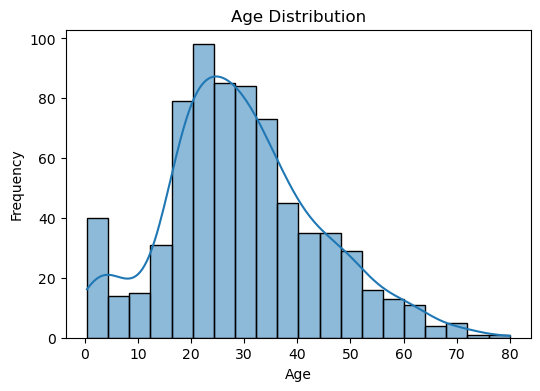

In [42]:
# Task 7: General 

import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset('titanic') 

print(df.head())
print(df.describe(include='all'))
print(df.isnull().sum())

plt.figure(figsize=(6, 4))
sns.histplot(df['age'].dropna(), bins=20, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

